# Tarefa 03

In [46]:
from PIL import Image as img
import numpy as np
import math
import random as rd
import matplotlib.pyplot as plt
from statistics import median

corredor = img.open("corredor_claro.jpg")

#cria o mapa de pixels
def pixelMap(image):
    return image.load()
#filtro sal e pimenta
def sal_pimenta(image, porcentagem):
    
    img = image.copy()
    pixels = pixelMap(img)
    num = int(img.size[0]*img.size[1]*porcentagem)
    p = True
    for i in range(num):    # for every col:
        a, b = rd.randint(0,(img.size[0]-1)),rd.randint(0,(img.size[1]-1))
        if p:
            pixels[a,b] = (255,255,255)
            p=False
        else:
            pixels[a,b] = (0,0,0)
            p=True
    return img

def plot(img1, img2, img3):
    fig = plt.figure(figsize=(100,100))
    a=fig.add_subplot(1,3,1)
    imgplot = plt.imshow(img1)
    a.set_title('Imagem 1')

    a=fig.add_subplot(1,3,2)
    imgplot = plt.imshow(img2)
    imgplot.set_clim(0.0,0.7)
    a.set_title('Imagem 2')
    
    a=fig.add_subplot(1,3,3)
    imgplot = plt.imshow(img3)
    imgplot.set_clim(0.0,0.7)
    a.set_title('Média')

def img_media(image1, image2):
    
    img1 = image1.copy()
    img2 = image2.copy()
    
    img0 = img.new("RGB", (int(img1.size[0]), int(img1.size[1])), color=0)
    
    px0 = pixelMap(img0)
    px1 = pixelMap(img1)
    px2 = pixelMap(img2)
    
    for i in range(img0.size[0]):
        for j in range(img0.size[1]):
            r = int((px1[i,j][0] + px2[i,j][0])/2)
            g = int((px1[i,j][1] + px2[i,j][1])/2)
            b = int((px1[i,j][2] + px2[i,j][2])/2)
            px0[i,j] = (r,g,b)
            
    return img0

def add_fronteira(image):
    img1 = image.copy()
    px1 = pixelMap(img1)
    
    img0 = img.new("RGB", (int(img1.size[0]+2), int(img1.size[1]+2)), color="white")
    px0 = pixelMap(img0)
    
    for i in range(img1.size[0]):
        for j in range(img1.size[1]):
            px0[i+1, j+1] = px1[i,j]
    return img0

def del_fronteira(image):
    img1 = image.copy()
    px1 = pixelMap(img1)
    
    img0 = img.new("RGB", (int(img1.size[0]-2), int(img1.size[1]-2)), color="white")
    px0 = pixelMap(img0)
    
    for i in range(img0.size[0]):
        for j in range(img0.size[1]):
            px0[i,j] = px1[i+1, j+1]
    return img0

def f_mediana(image):
    img = image.copy()
    px = pixelMap(img)
    
    for i in range(1,(img.size[0]-1)):
        for j in range(1,(img.size[1]-1)):
            px[i,j] = median([ px[i-1,j-1] , px[i,j-1] , px[i+1,j-1],
                               px[i-1,j]   , px[i,j]   , px[i+1,j],
                               px[i-1,j+1] , px[i,j+1] , px[i+1,j+1] ])
    return img

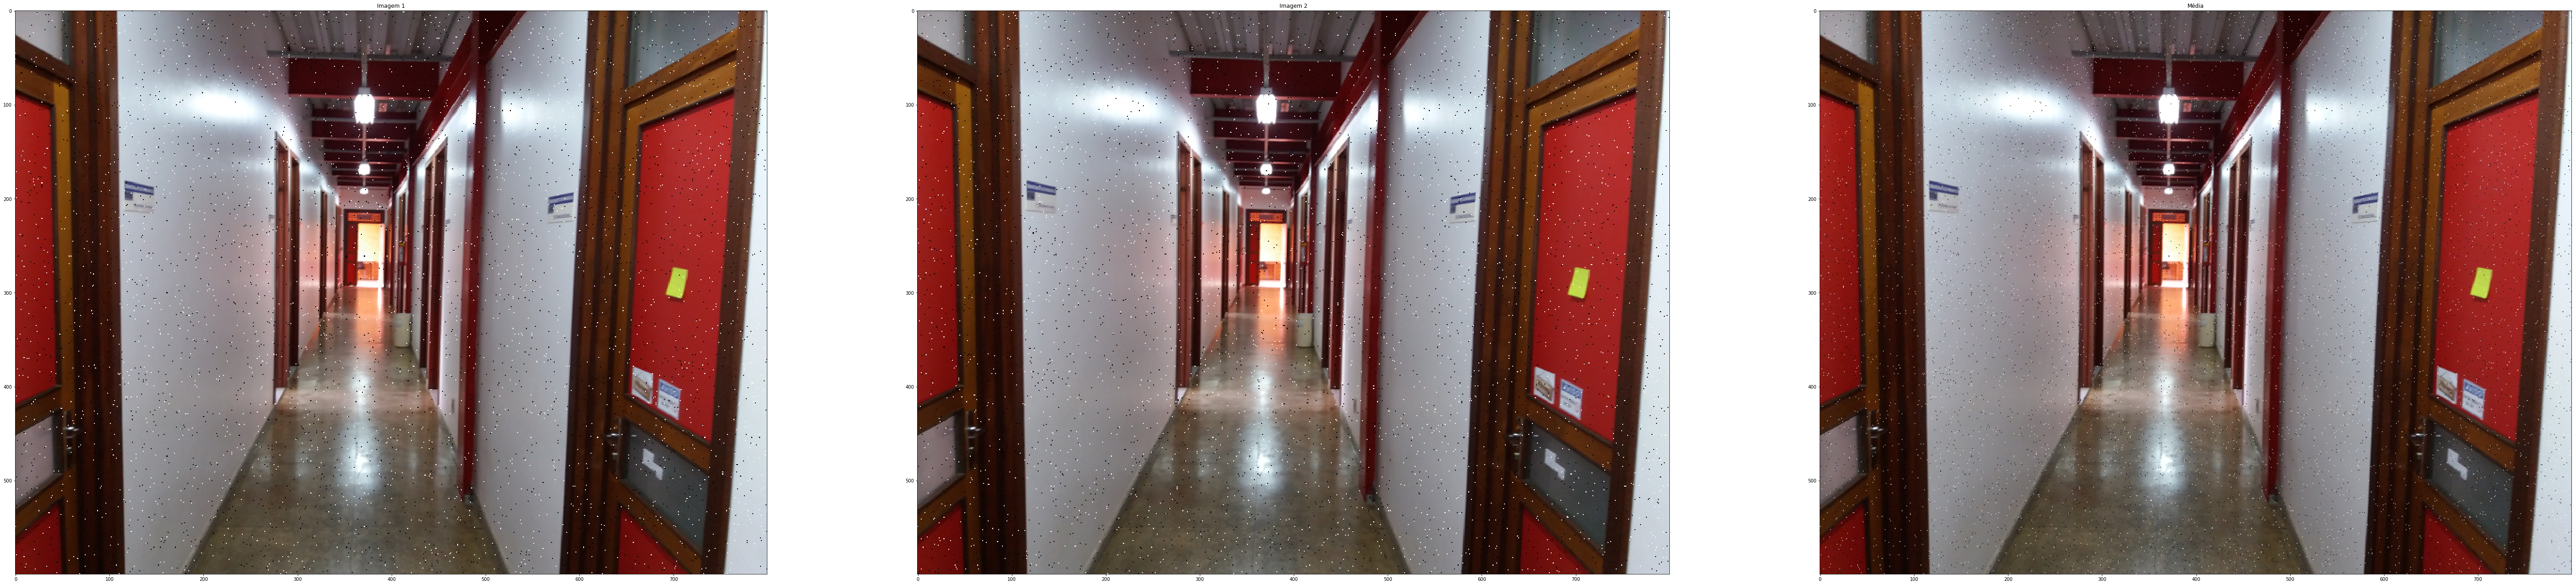

In [47]:
c1 = sal_pimenta(corredor, 0.01)
c2 = sal_pimenta(corredor, 0.01)
media = img_media(c1, c2)

plot(c1, c2, media)

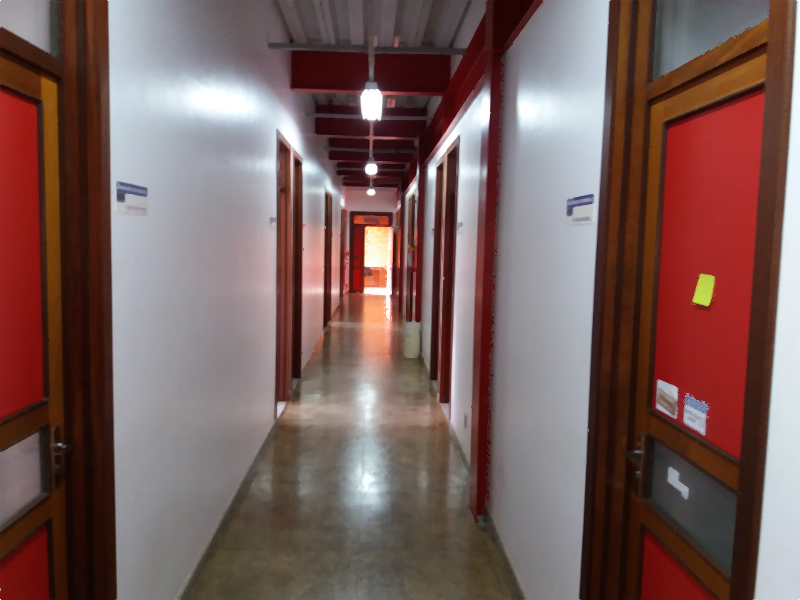

In [42]:
#Adiciona uma fronteira a imagem
imgMediana = add_fronteira(media)
#Aplica o filtro da mediana
imgMediana = f_mediana(imgMediana)
#Remove a fronteira da imagem
imgMediana = del_fronteira(imgMediana)

imgMediana

## Salvando os arquivos:

In [45]:
c1.save("./resource/img/Tarefa03/sal_pimenta_01.jpg")
c2.save("./resource/img/Tarefa03/sal_pimenta_02.jpg")
media.save("./resource/img/Tarefa03/sal_pimenta_media.jpg")
imgMediana.save("./resource/img/Tarefa03/filtro_mediana.jpg")